# Разведочный анализ данных (EDA) на Python

## 0. Задание

I. Для [набора данных](https://archive.ics.uci.edu/ml/datasets/auto+mpg "Auto MPG Data Set"):
Импортировать data set.
Провести предобработку (проверить на наличие выбросов, пропусков). Если есть выбросы, удалить. Если есть пропуски, обработать, как сочтёте нужным.
Найти числовые характеристики признаков и зависимой переменной.
Проверить на наличие связей зависимой переменной с факторами и факторов между собой, применяя методы корреляционного анализа и сравнения групп.
Визуализировать данные и зависимости между ними.

II. На основании результатов I, выбрать значимые факторы и построить регрессионную модель зависимой переменной от признаков, предварительно разбив выборку на обучающую и тестовую.
Предложить разные алгоритмы (например, Linear Regression, Decision Tree, Random Forest, Gradient Boosting). Выбрать наилучший.

III. В качестве результата предоставить код в формате ipynb или py. Пишите комментарии к коду в Markdown или прямо в коде через #.

## 1. Импорт и предобработка Data Set'а

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)

5. Number of Instances: 398

6. Number of Attributes: 9 including the class attribute

7. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

8. Missing Attribute Values:  horsepower has 6 missing values

In [1]:
# установка библиотек

import scipy.stats as sps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Загрузим датасет и добавим наименование столбцов из описания

df = pd.read_csv('data/auto-mpg.data-original.csv', sep='\s+', header=None, )
ls_columns = ('mpg', # миль на галлон
              'cylinders', # цилиндры
              'displacement', # смещение
              'horsepower', # лошадиная сила
              'weight', # вес
              'acceleration', # ускорение
              'model_year', # модельный год
              'origin', # происхождение
              'car_name') # название автомобиля: строка (уникальная для каждого экземпляра)
df.columns = ls_columns
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [3]:
# посмотрим на переменные

df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Предобработка данных (поиск выбросов)

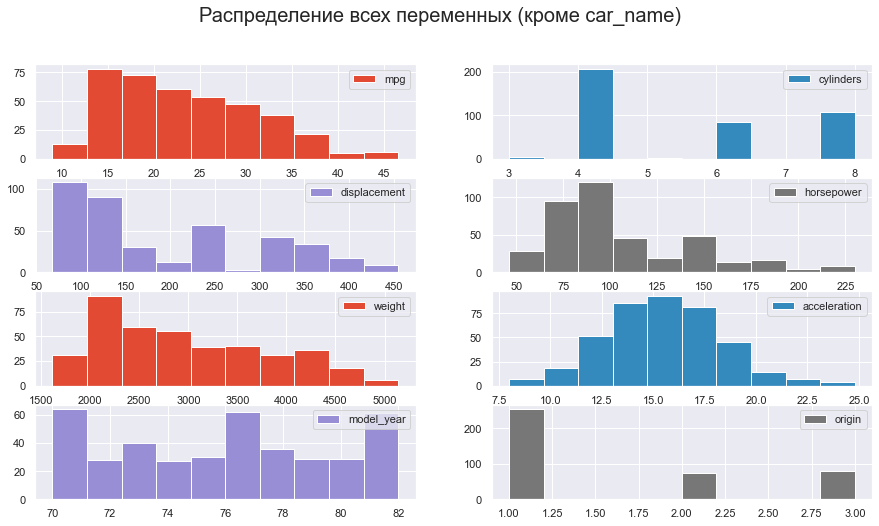

In [4]:
# Посмотрим распределение данных по всем переменным, кроме "car_name" ()

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 8))
colors = ["#e24a33", "#348abd", "#988ed5", "#777777", "#e24a33", "#348abd", "#988ed5", "#777777"] # whatever the colors may be but it should be different for each histogram.
for index, column in enumerate(df.columns[:-1]):
    ax = axes.flatten()[index]
    ax.hist(df[column], color = colors[index], label = column)
    ax.legend(loc = "best")
plt.suptitle("Распределение всех переменных (кроме car_name)", size = 20)
plt.show()

Аномальные выбросы отсутствуют. Выбросы можно в данном датасете не удалять.

### Поиск пропусков

In [5]:
# В описании присутствует информация о пропусках, но посмотрим сами.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
model_year      406 non-null float64
origin          406 non-null float64
car_name        406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


<AxesSubplot:ylabel='Frequency'>

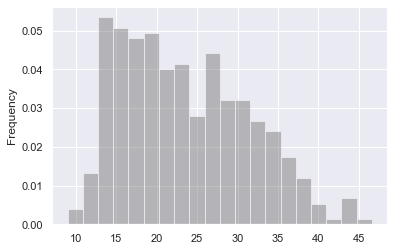

In [6]:
# пропуски есть только в 'mpg'. Еще более пристально взглянем на распределение:

df.mpg.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='grey')

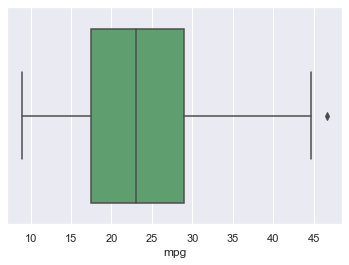

In [7]:
# и построим бокс-плот к нему:
sns.boxplot(df.mpg, orient="g", color='g')
plt.show()

In [8]:
# Чтобы понять, на какие значение необходимо заменить NaN, надо посмотреть на эти данные.
# Посмотрим, в каких строках есть пропуски?

df[df.mpg.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
367,NaN,4.0,121.0,110.0,2800.0,15.4,81.0,2.0,saab 900s


In [9]:
# из предыдущей ячейки видно, что данные по mpg отсутствуют у самых старых машин (70-го года выпуска).
#  Заменим данные по автомобилям 70 года выпуска на медиану этой группы

df_model_year70 = df[(df.mpg.notnull()) & (df.model_year == 70)]
median_model_year70 = df_model_year70.mpg.median(axis = 0, skipna = True)

df.loc[(df.mpg.isnull()) & (df.model_year == 70), 'mpg'] = median_model_year70

In [10]:
# ... и посмотрим, что осталось незаполненным:

df[df.mpg.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
367,NaN,4.0,121.0,110.0,2800.0,15.4,81.0,2.0,saab 900s


In [11]:
# оставшиеся две строки заменим средними значениями по всей выборке.

df.mpg.fillna(df.mpg.mean(), inplace = True)

In [12]:
# Посмотрим, какие есть пропуски в horsepower (лошадиных силах)

df[df.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe
343,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0,ford mustang cobra
361,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0,renault 18i
382,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0,amc concord dl


In [13]:
# эти пропуски заменим тоже средним значением:

df.horsepower.fillna(df.horsepower.mean(), inplace = True)

### Числовые характеристики признаков и зависимой переменной.

In [14]:
# Посмотрим у целевой (зависимой) переменной основные числовые характеристики:

print('Mean: ', df.mpg.mean())
print('Median: ', df.mpg.median())
print('Variance: ', df.mpg.var())
print('Standard Deviation: ', df.mpg.std())

Mean:  23.402970297029707
Median:  22.75
Variance:  60.70705292751497
Standard Deviation:  7.791473090983179


In [15]:
# Посчитаем все основные значения для всех столбцов (признаков и целевой функции)

df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.402970,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.791473,1.712160,104.922458,38.480531,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,76.000000,2226.500000,13.700000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Корреляция

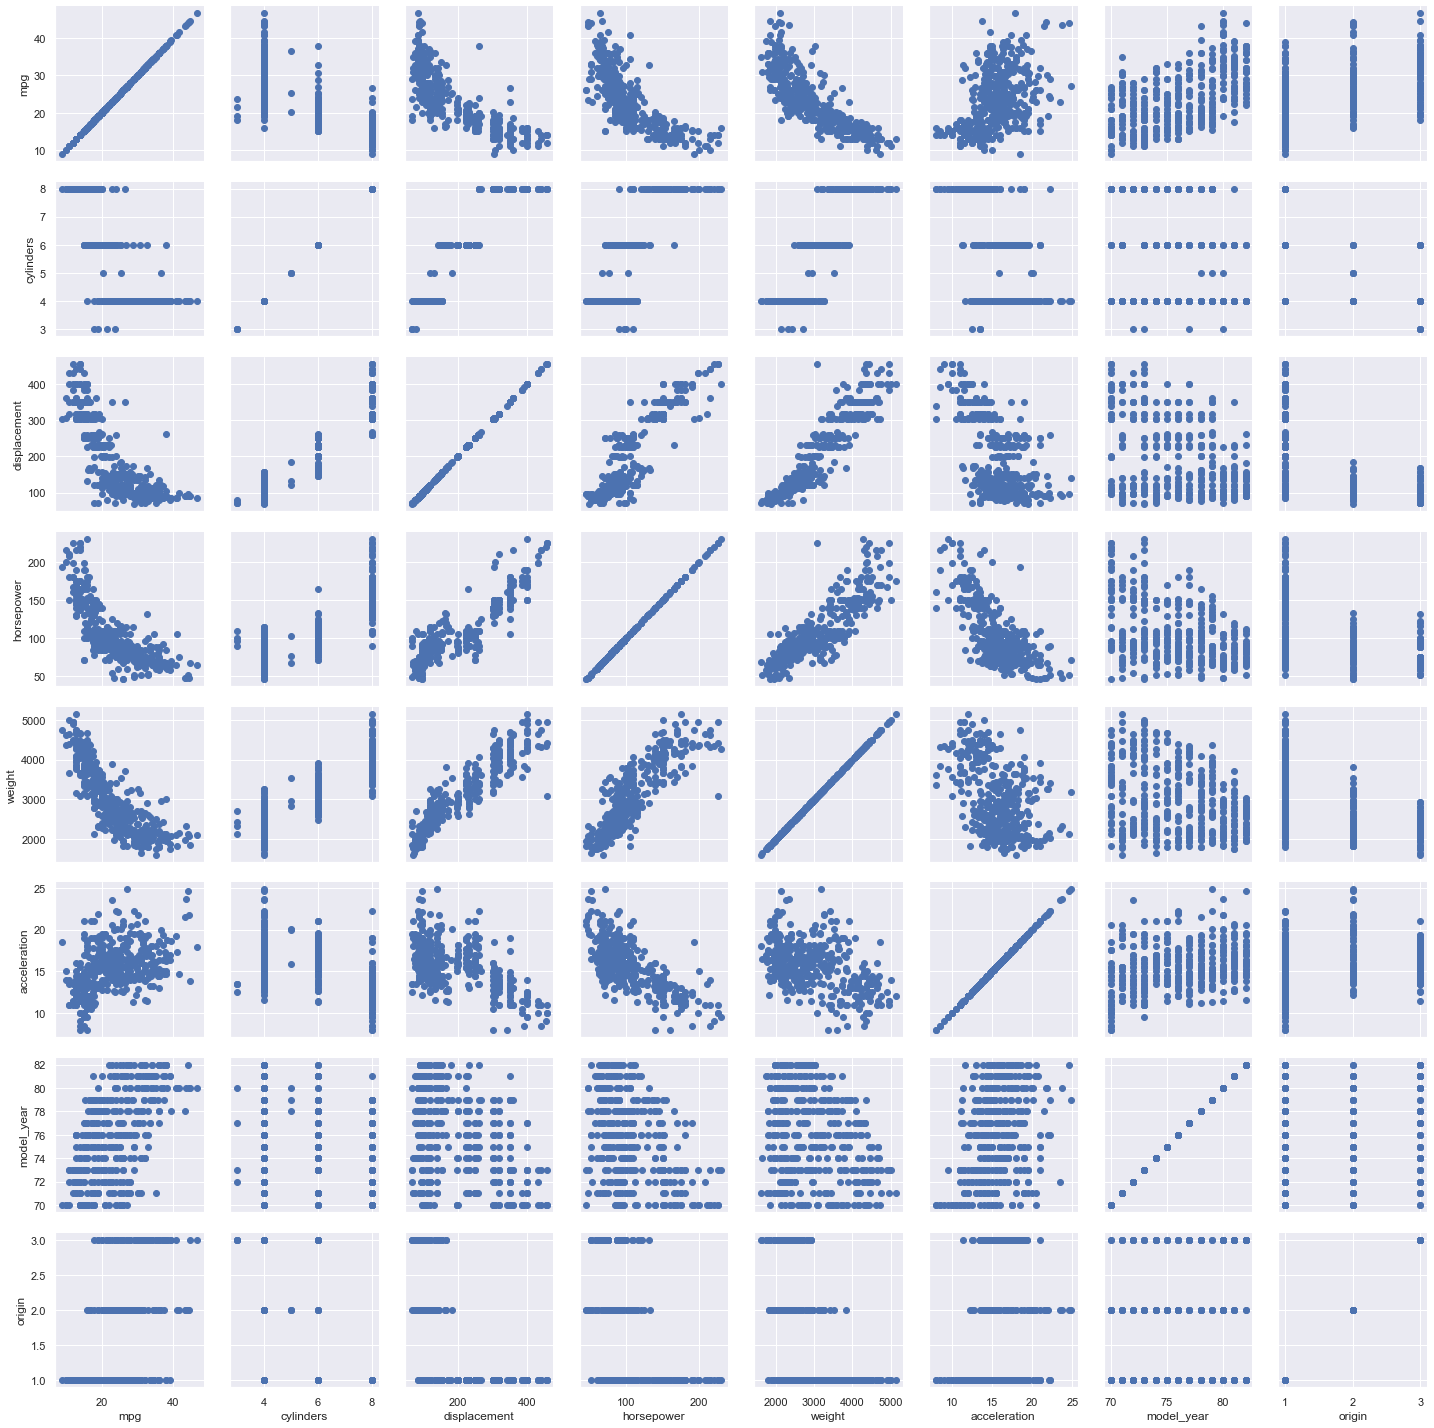

In [16]:
# Переменных не так много. Посмотрим корреляцию на графиках по принципу "все со всеми"

pair_grid_plot = sns.PairGrid(df)
pair_grid_plot.map(plt.scatter)

<AxesSubplot:>

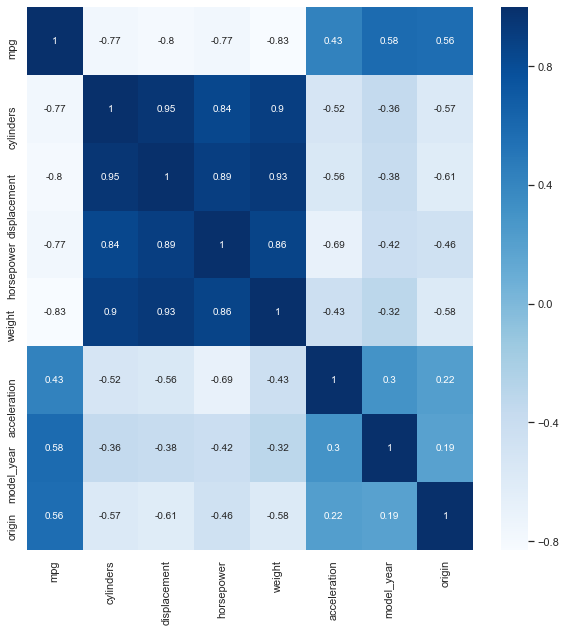

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Blues')

In [18]:
# Сразу видно, какие переменные коррелируют, а какие нет. Но более качественно это будет видно на числах в таблице.
# Сделаем таблицу корреляций по mpg:

ser_corr = df.corrwith(other=df.mpg)
df_corr = pd.DataFrame({'colum':ser_corr.index, 'corr':ser_corr.values})
df_corr

,colum,corr
0,mpg,1.000000
1,cylinders,-0.772947
2,displacement,-0.801943
3,horsepower,-0.770950
4,weight,-0.831049
5,acceleration,0.426558
6,model_year,0.584412
7,origin,0.564407


## II Построение моделей

In [19]:
# наиболее значимые переменные, которые коррелируют в абсолюте более 0.5

df_corr_50 = df_corr.loc[(df_corr['corr'] > 0.5) | (df_corr['corr'] < 0.5)][1:]
df_corr_50.colum

1       cylinders
2    displacement
3      horsepower
4          weight
5    acceleration
6      model_year
7          origin
Name: colum, dtype: object

In [ ]:
!pip install lightgbm

In [20]:
# решается задача регрессии. Поэтому подключаем библиотеки:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lbm

In [21]:
# и метрики к ним:

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix 

In [22]:
# подготовим целевую функцию y:
y = df.mpg
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [23]:
# подготовим переменные в X, которые хорошо коррелируют:

X = df[df_corr_50.colum]
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [24]:
# Длина дата-сета незначительная. Поэтому будем использовать для обучения 0.8 часть

from sklearn.model_selection import train_test_split

# Разделение всех получившихся выброк на обучающую и тестовую (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

### Линейная регрессия

In [25]:
res = []

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Коэффициенты модели: ')
print(lr.coef_)
print('Свободный член: ')
print(lr.intercept_)

res.append(['LinearRegression ', round(r2_score(y_test, y_pred), 6), round(mean_squared_error(y_test, y_pred), 6)])

Коэффициенты модели: 
[-0.58718175  0.02422547 -0.03366736 -0.00631333 -0.06736599  0.72021757
  1.62398309]
Свободный член: 
-11.933255044519253


### Гребневая регрессия

In [26]:
ridge = RidgeCV()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

res.append(['Гребневая регрессия (Ridge Regression)', round(r2_score(y_test, y_pred), 6), round(mean_squared_error(y_test, y_pred), 6)])

### Lasso-регрессия

In [27]:
lasso = LassoCV()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

res.append(['Lasso-регрессия (Lasso Regression)', round(r2_score(y_test, y_pred), 6), round(mean_squared_error(y_test, y_pred), 6)])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


### Метод опорных векторов

In [28]:
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

res.append(['Метод опорных векторов (Support Vector Machine)', round(r2_score(y_test, y_pred), 6), round(mean_squared_error(y_test, y_pred), 6)])

### Решающие деревья

In [29]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

res.append(['Решающие деревья (Decision Tree)', round(r2_score(y_test, y_pred), 6), round(mean_squared_error(y_test, y_pred), 6)])

### Случайный лес

In [30]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

res.append(['Случайный лес (Random Forest)', round(r2_score(y_test, y_pred), 6), round(mean_squared_error(y_test, y_pred), 6)])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Градиентный бустинг

In [31]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

res.append(['Градиентный бустинг (Gradient Boosting)', round(r2_score(y_test, y_pred), 6), round(mean_squared_error(y_test, y_pred), 6)])

### LightGBM регрессор

In [32]:
lbm_ = lbm.LGBMRegressor()
lbm_.fit(X_train, y_train)
y_pred = lbm_.predict(X_test)

res.append(['LightGBM регрессор (LightGBM Regressor)', round(r2_score(y_test, y_pred), 6), round(mean_squared_error(y_test, y_pred), 6)])

In [33]:
# Сравним результаты по метрике r2 в одной таблице

pd.DataFrame(res, columns = ['Метод', 'R²', 'MSE']).set_index('Метод').sort_values('R²', ascending = False)

,R²,MSE
Метод,,
Градиентный бустинг (Gradient Boosting),0.860824,8.635999
LightGBM регрессор (LightGBM Regressor),0.854909,9.003004
Случайный лес (Random Forest),0.853914,9.064752
Гребневая регрессия (Ridge Regression),0.787570,13.181434
LinearRegression,0.785818,13.290140
Lasso-регрессия (Lasso Regression),0.726755,16.955049
Решающие деревья (Decision Tree),0.708225,18.104900
Метод опорных векторов (Support Vector Machine),0.444565,34.465179


## Выводы
Наилучший результат предсказания расхода топлива (mpg) показал метод Градиентного бустинга.